# Detecting faces in images

Histograms of Oriented Gradients for Human Detection is a useful way of detecting faces in images (http://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf)


The dlib module has an implementation of the algorithm: http://dlib.net/python/index.html#dlib.face_recognition_model_v1

In [202]:
%matplotlib inline

import sys
import dlib


import matplotlib.pyplot as plt
import matplotlib.patches as patches

from skimage import io

In [3]:
face_detector = dlib.get_frontal_face_detector()

In [106]:
def coord_finder(d):
    width = d.right() - d.left()
    height = d.top() - d.bottom()
    lower_x_y = (d.right() - width, d.bottom())
    
    return (width, height, lower_x_y)

In [130]:
def face_painter(image_path, detector):
    im = io.imread(image_path)
    f = detector(im, 1)
    fig,ax = plt.subplots(1)
    fig.set_size_inches(12, 9)
    ax.imshow(im)

    for box in f:
        width, height, lower_x_y = coord_finder(box)
        rect = patches.Rectangle(lower_x_y,width, height, linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect);

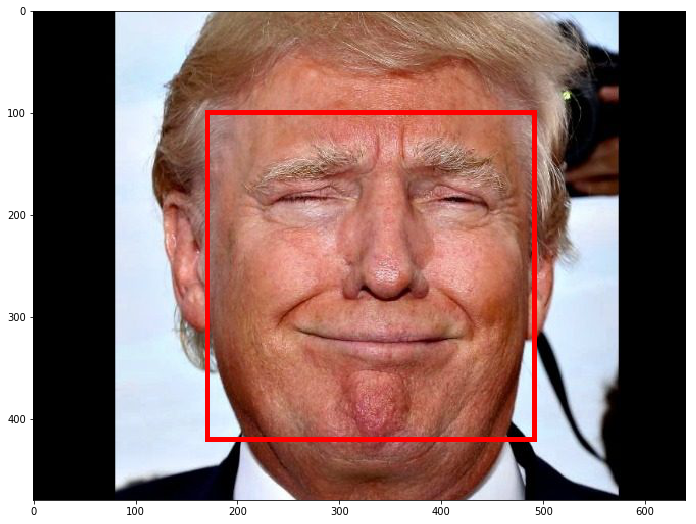

In [131]:
face_painter(r"D:\Pictures\TheDonald.jpg", face_detector)

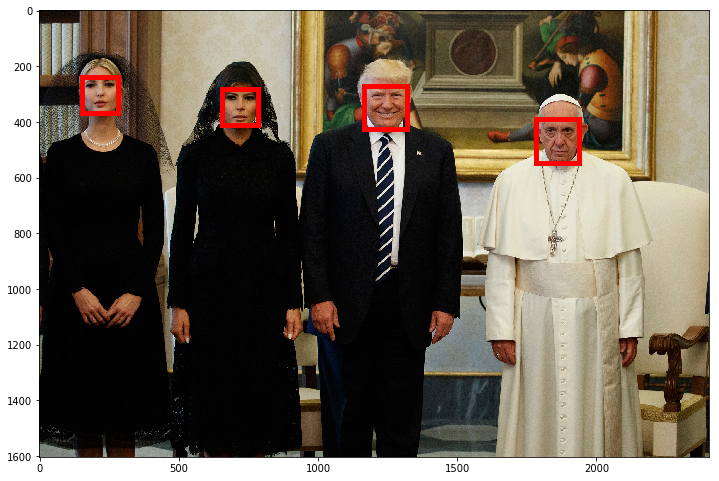

In [132]:
face_painter("D:\Pictures\TheDonald2.jpg", face_detector)

In [135]:
face_pose_predictor = dlib.shape_predictor(r"D:\Models\shape_predictor_68_face_landmarks.dat")

In [199]:
def face_painter(image_path, detector, pose_predictor):
    im = io.imread(image_path)
    f = detector(im, 1)
    fig,ax = plt.subplots(1)
    fig.set_size_inches(12, 9)
    ax.imshow(im)

    
    
    for box in f:
        width, height, lower_x_y = coord_finder(box)
        rect = patches.Rectangle(lower_x_y,width, height, linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect);
        
        pose_landmarks = pose_predictor(im, box)
        
        for i in range(len(pose_landmarks.parts())):
            ax.plot(pose_landmarks.part(i).x, pose_landmarks.part(i).y, marker='o', markersize=3, color="blue")
        

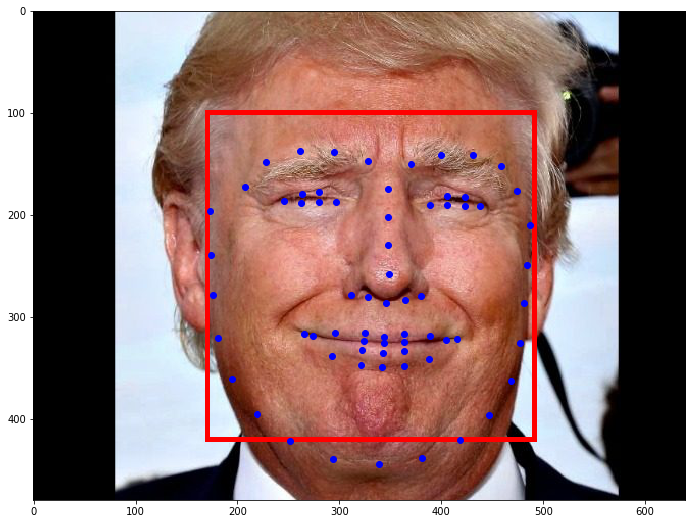

In [196]:
face_painter(r"D:\Pictures\TheDonald.jpg", face_detector, face_pose_predictor)

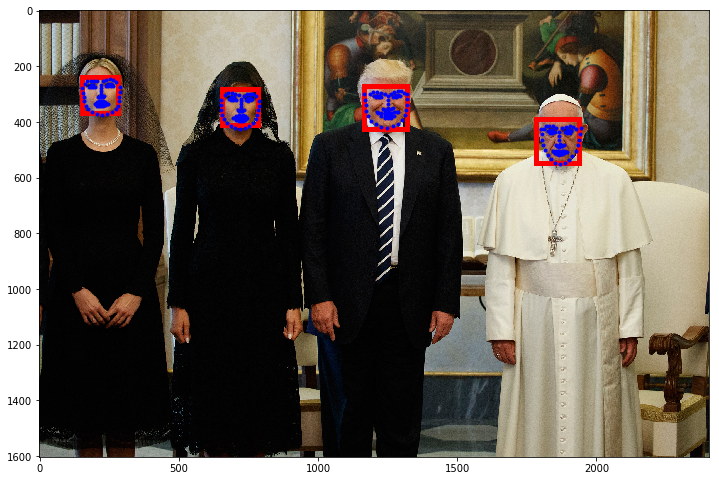

In [200]:
face_painter("D:\Pictures\TheDonald2.jpg", face_detector, face_pose_predictor)